In [1]:
import torch
from architecture import resnet50
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load classes names
with open('sets/classes.txt', 'r') as f:
    classes = [l.strip() for l in f.readlines()]
print('Loaded {} classes:'.format(len(classes)))
print('\n'.join(classes))

Loaded 10 classes:
11H(ANTONY OF PADUA)
11H(JOHN THE BAPTIST)
11H(PAUL)
11H(FRANCIS)
11HH(MARY MAGDALENE)
11H(JEROME)
11H(DOMINIC)
11F(MARY)
11H(PETER)
11H(SEBASTIAN)


In [3]:
# initialize model
num_classes = 10
model = resnet50.Net(num_classes)
print(model)

Net(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FixedBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FixedBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (

In [4]:
# load weights
weights_path = 'model/res50.pth'
model.load_state_dict(torch.load(weights_path), strict=True)
print('Model loaded')

Model loaded


In [5]:
# set model to be run on GPU
model.cuda()
# set model to run on eval mode
model.eval()

In [6]:
def normalize_img(img):
    
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)

    imgarr = np.asarray(img) / 255
    
    proc_img = np.empty_like(imgarr, np.float32)
    proc_img[..., 0] = (imgarr[..., 0] - mean[0]) / std[0]
    proc_img[..., 1] = (imgarr[..., 1] - mean[1]) / std[1]
    proc_img[..., 2] = (imgarr[..., 2] - mean[2]) / std[2]

    return proc_img

def HWC_to_CHW(img):
    return np.transpose(img, (2, 0, 1))

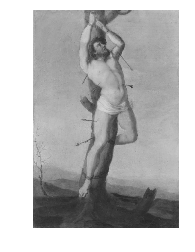

In [7]:
# load img
img_path = 'test-data/Q18599229.jpg'
img = np.asarray(imageio.imread(img_path))
# show img
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# normalize img based on imagenet std and mean
img = normalize_img(img)
# transpose channel to have (3, H, W)
img = HWC_to_CHW(img)
# add batch to dimensions
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 3, 898, 600)


In [9]:
# numpy to pytorch tensor
img = torch.from_numpy(img)
# load image on gpu
img = img.cuda()

In [10]:
# run model on img
output = model(img)
# get probabilities from sigmoid
output = torch.sigmoid(output[0])
probs = output.data.cpu().numpy()
print(probs)

[1.9246356e-13 8.4629397e-22 3.4322982e-16 1.3139526e-13 2.8548314e-27
 1.2344872e-14 1.8544492e-08 3.9362610e-23 9.8079740e-22 1.0000000e+00]


In [11]:
for c, p in list(zip(classes, probs)):
    print('{} - {:.4f}'.format(c, p))

11H(ANTONY OF PADUA) - 0.0000
11H(JOHN THE BAPTIST) - 0.0000
11H(PAUL) - 0.0000
11H(FRANCIS) - 0.0000
11HH(MARY MAGDALENE) - 0.0000
11H(JEROME) - 0.0000
11H(DOMINIC) - 0.0000
11F(MARY) - 0.0000
11H(PETER) - 0.0000
11H(SEBASTIAN) - 1.0000
